In [228]:

# Import Packages
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier





In [229]:
import os
os.path.isfile('./fetal_health.csv')

True

In [230]:
dataFile = pd.read_csv('./fetal_health.csv')


In [231]:
dataFile.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [232]:
# Clean the Data


dataFile.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [233]:
dataFile.shape

(2126, 22)

In [234]:
dataFile.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [235]:
dataFile.duplicated().sum()
dataFile.drop_duplicates(inplace=True)



In [236]:
dataFile.shape

(2113, 22)

In [237]:
dataFile.fetal_health.value_counts()

1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64

/Users/swetha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


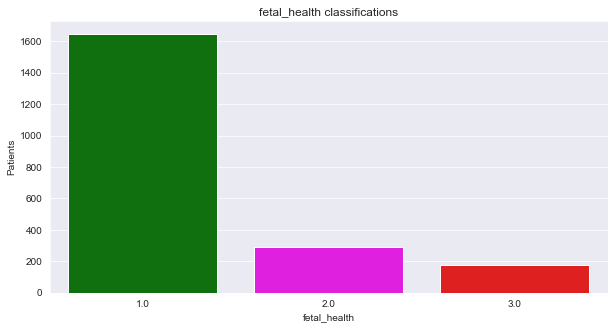

In [238]:
sn.set_style('darkgrid')
plt.figure(figsize = (10,5))
sn.countplot(dataFile['fetal_health'], alpha = 1, palette= ['green','magenta','red'])
plt.title('fetal_health classifications')
plt.ylabel('Patients')

plt.show()

In [239]:
# Assigning features variables (X) and target variable (y)
X = dataFile.drop('fetal_health', axis=1)
y = dataFile.fetal_health

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [240]:
# Checking if train test split ran correclty
for dataset in [y_train, y_test]:
    print(round(len(dataset)/len(y), 2))

0.75
0.25


In [241]:
# value counts for having heart disease or not
dataFile['fetal_health'].value_counts()

1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64

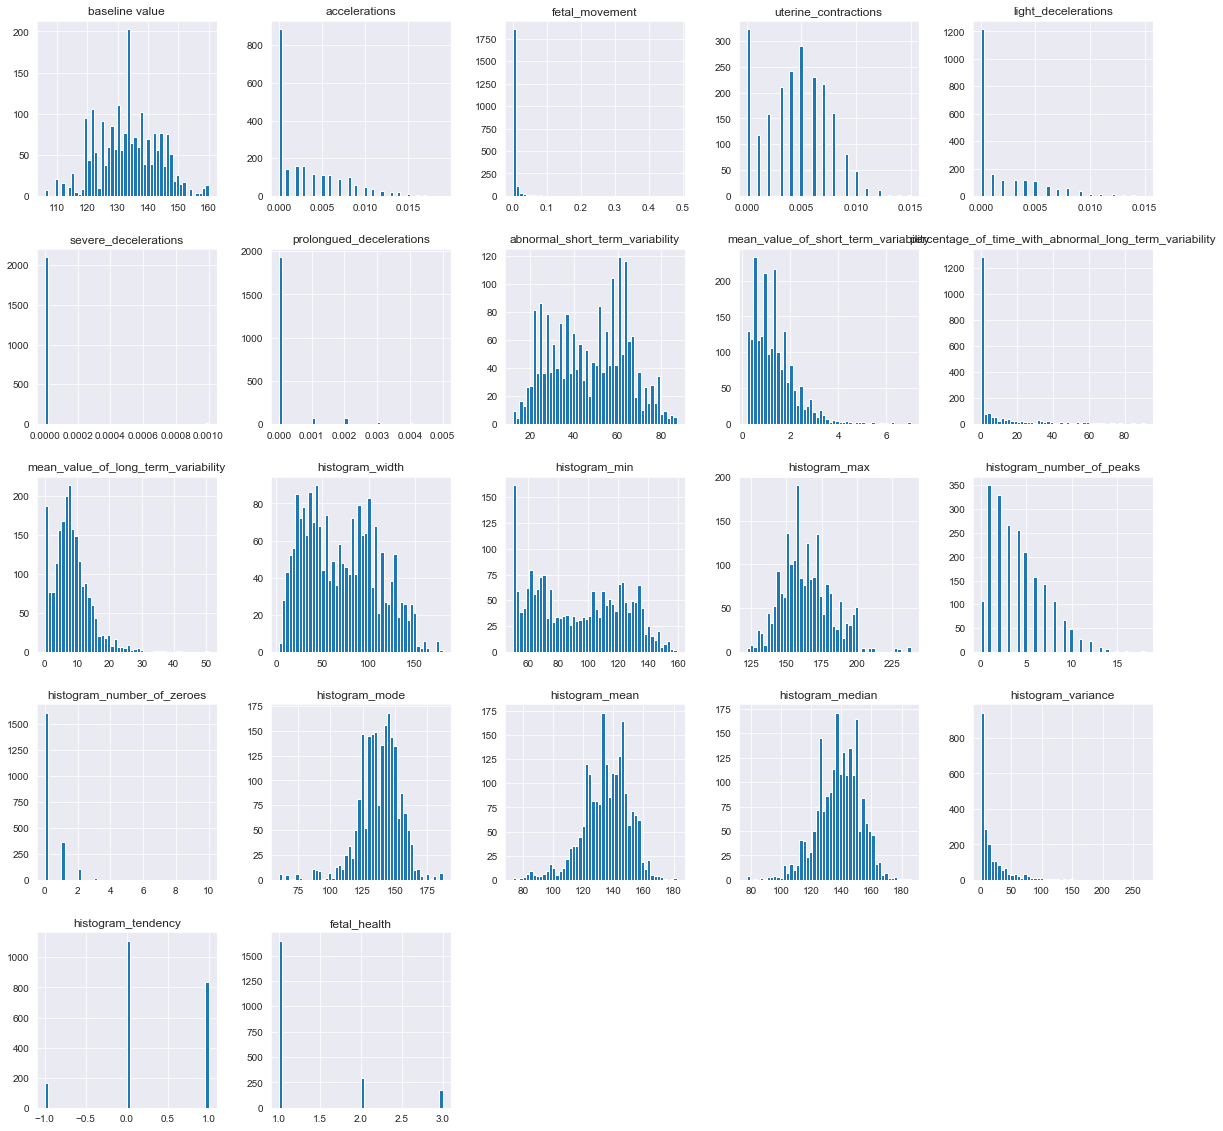

In [242]:
# Histogram of all featrues
dataFile.hist(bins=50, figsize=(20,20))
plt.show()

In [243]:
#Check the statistical data of the features
dataFile.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2113.000000    2113.000000     2113.000000           2113.000000   
mean       133.304780       0.003188        0.009517              0.004387   
std          9.837451       0.003871        0.046804              0.002941   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.005000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2113.000000           2113.000000               2113.000000   
mean              0.001901              0.000003                  0.000159   
std               0.002966              0.000057                  0.000592   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2113.000000                           2113.000000   
mean                         46.993848                              1.335021   
std                          17.177782                              0.884368   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                        2113.000000       ...   
mean                                            9.795078       ...   
std                                            18.337073       ...   
min                                             0.000000       ...   
25%                                             0.000000       ...   
50%                                             0.000000       ...   
75%                                            11.000000       ...   
max                                            91.000000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2113.000000    2113.000000                2113.000000   
mean       93.564600     164.099858                   4.077142   
std        29.562269      17.945175                   2.951664   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   4.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2113.000000     2113.000000     2113.000000   
mean                     0.325603      137.454330      134.599621   
std                      0.707771       16.402026       15.610422   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

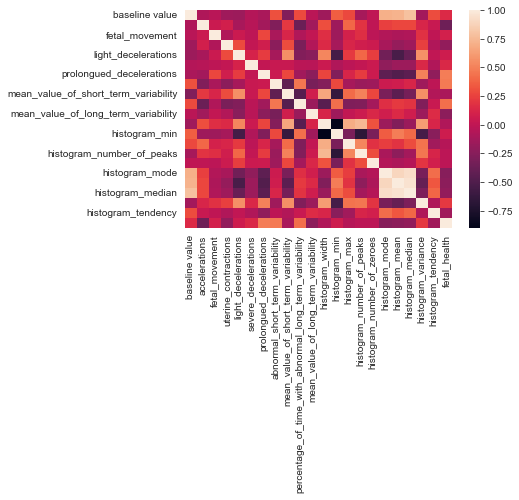

In [244]:
dataFile.corr

sn.heatmap(dataFile.corr())
plt.show()

In [245]:
#create dataframe of predictor variables
fetal_health_pred = dataFile.drop('fetal_health', axis =1)

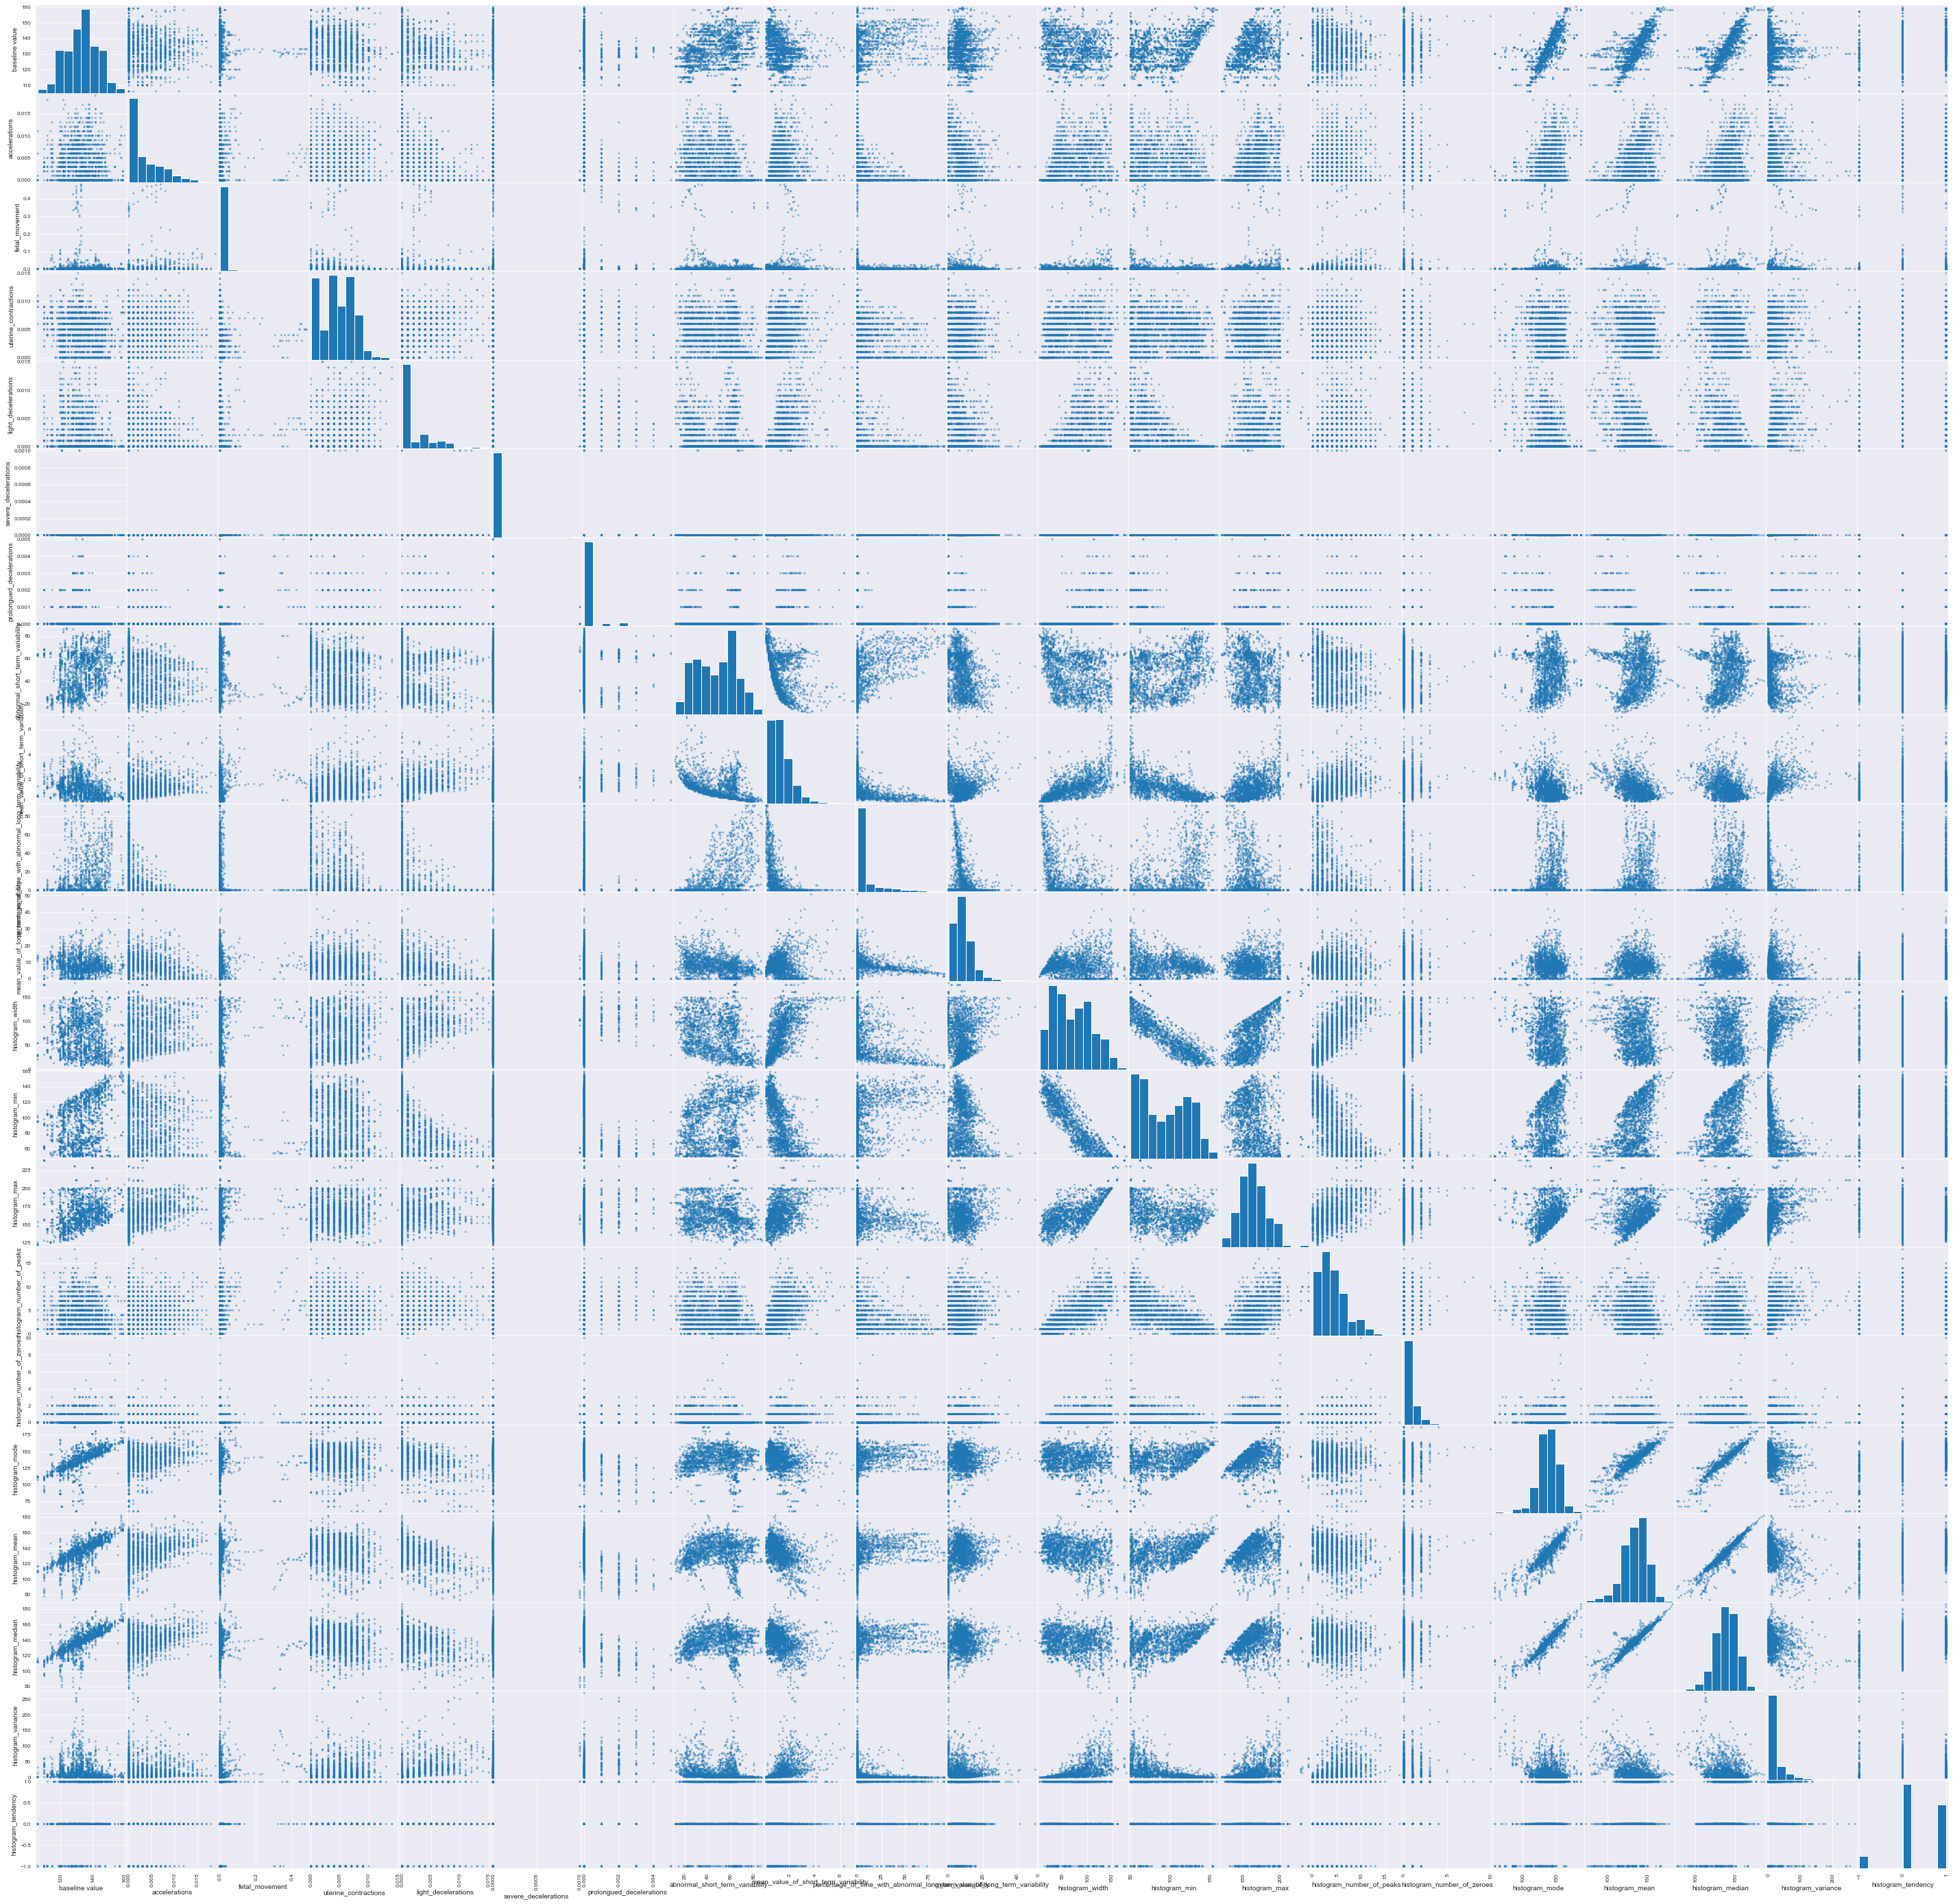

In [246]:
#plot a scatter matrix of predictor variable relationships
pd.plotting.scatter_matrix(fetal_health_pred,figsize= (50,50));
plt.show()

In [247]:
# In this section of the EDA we checked individual features and their interactions with the target and other features.  We were looking any irregularities, outliers and distributions, that we could use to create new features for better classification.  

In [248]:
#check value counts of uterine_contractions
dataFile.uterine_contractions.value_counts()

0.000    323
0.005    290
0.004    242
0.006    231
0.007    216
0.003    211
0.008    160
0.002    159
0.001    118
0.009     82
0.010     49
0.011     16
0.012     11
0.013      2
0.014      2
0.015      1
Name: uterine_contractions, dtype: int64

In [249]:
#Check value counts of abnormal short term varitability
dataFile.abnormal_short_term_variability.value_counts()

60.0    62
58.0    61
65.0    59
63.0    58
64.0    58
        ..
14.0     4
86.0     4
12.0     2
82.0     2
87.0     1
Name: abnormal_short_term_variability, Length: 75, dtype: int64

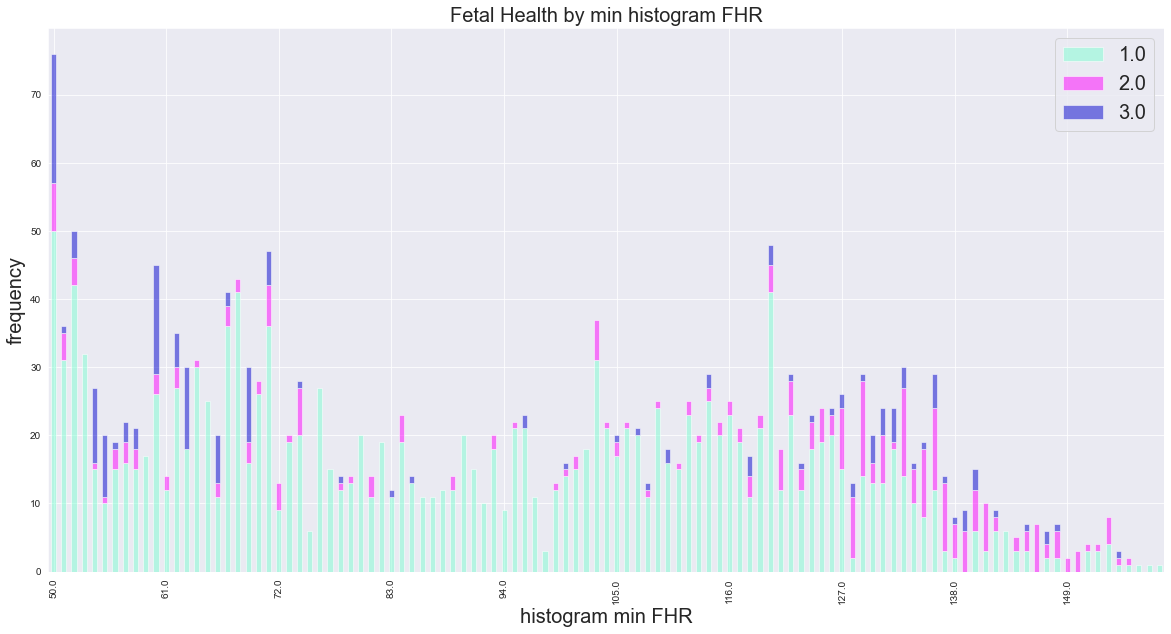

In [250]:
#Histogram showing the histogram distrubition values of minimum FHR by the Classes
histogram_min = dataFile.groupby(['histogram_min','fetal_health']).histogram_min.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       color = ['aquamarine','magenta','mediumblue'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('histogram min FHR',fontsize=20)
pl.locator_params(axis='x',nbins=10)
pl.legend(fontsize=20)
pl.set_ylabel('frequency',fontsize=20)
pl.set_title('Fetal Health by min histogram FHR',fontsize=20)
plt.show()

In [251]:
dataFile.severe_decelerations.value_counts()

0.000    2106
0.001       7
Name: severe_decelerations, dtype: int64

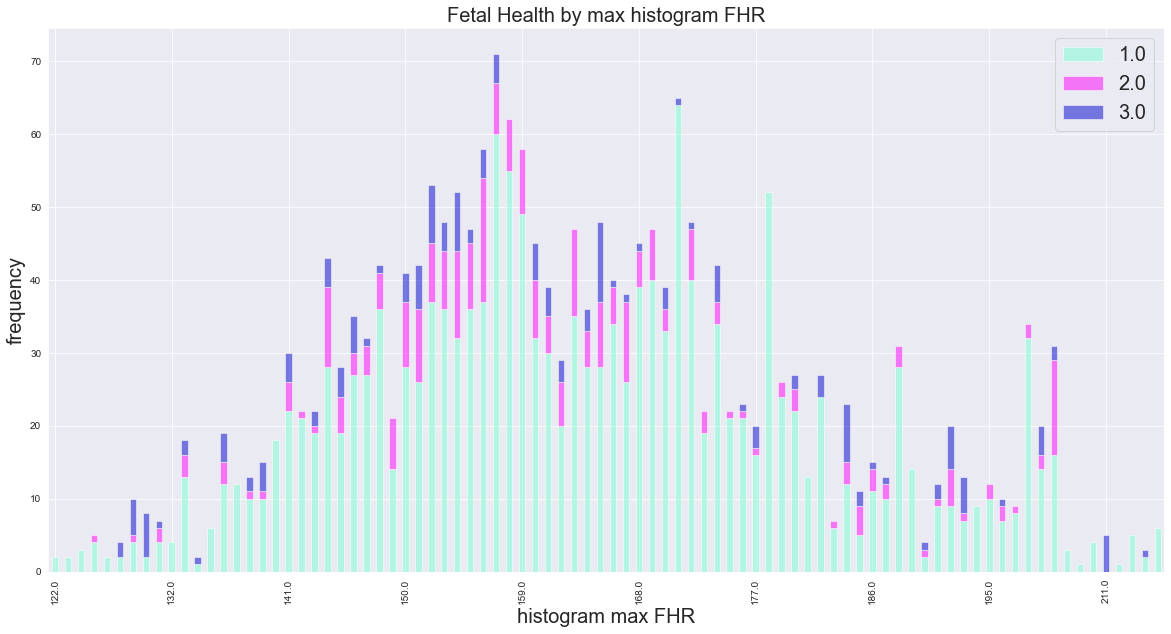

In [252]:
# Histogram showing the histogram distribution values of maximum FHR by the Classes
histogram_min = dataFile.groupby(['histogram_max','fetal_health']).histogram_max.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       color = ['aquamarine','magenta','mediumblue'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('histogram max FHR',fontsize=20)
pl.locator_params(axis='x',nbins=10)
pl.legend(fontsize=20)
pl.set_ylabel('frequency',fontsize=20)
pl.set_title('Fetal Health by max histogram FHR',fontsize=20)
plt.show()

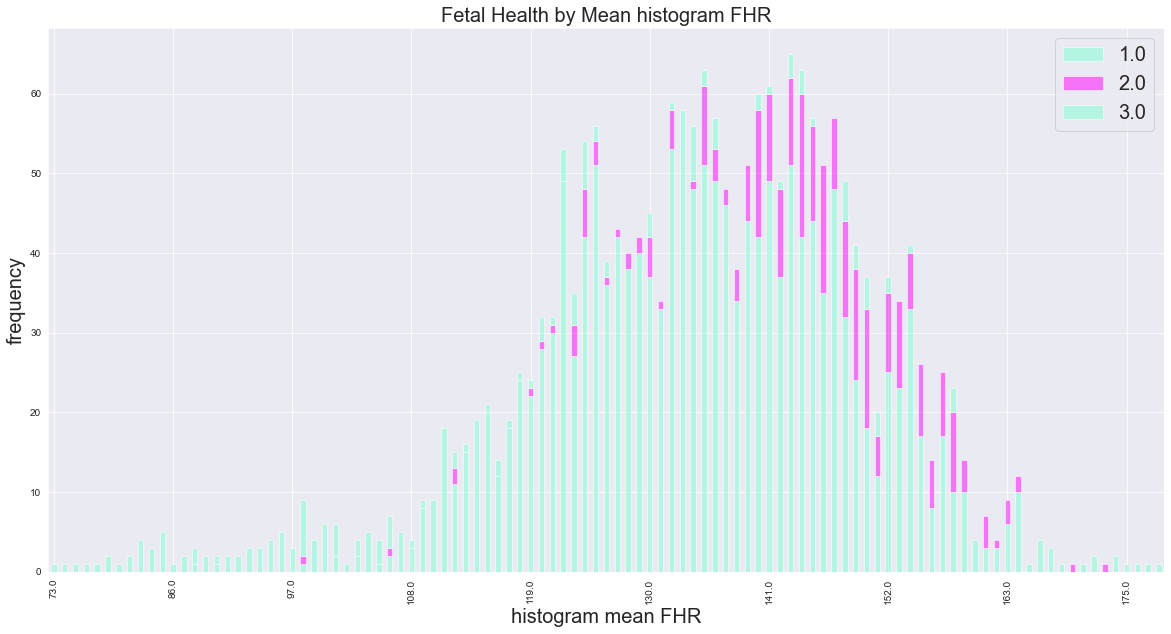

In [253]:
# #Histogram showing the histogram distribution values of average FHR by the Classes
histogram_min = dataFile.groupby(['histogram_mean','fetal_health']).histogram_mean.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       color = ['aquamarine','magenta'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('histogram mean FHR',fontsize=20)
pl.locator_params(axis='x',nbins=10)
pl.legend(fontsize=20)
pl.set_ylabel('frequency',fontsize=20)
pl.set_title('Fetal Health by Mean histogram FHR',fontsize=20)
plt.show()

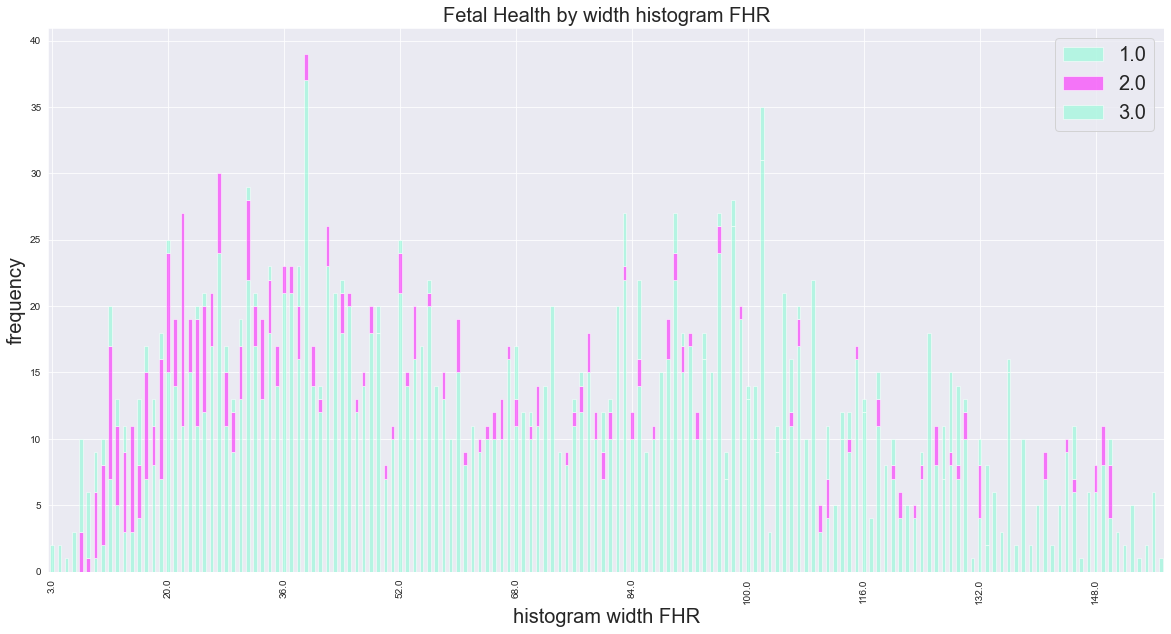

In [254]:
# #Histogram showing the histogram mean values of average FHR by the Classes
histogram_min = dataFile.groupby(['histogram_width','fetal_health']).histogram_width.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       color = ['aquamarine','magenta'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('histogram width FHR',fontsize=20)
pl.locator_params(axis='x',nbins=10)
pl.legend(fontsize=20)
pl.set_ylabel('frequency',fontsize=20)
pl.set_title('Fetal Health by width histogram FHR',fontsize=20)
plt.show()

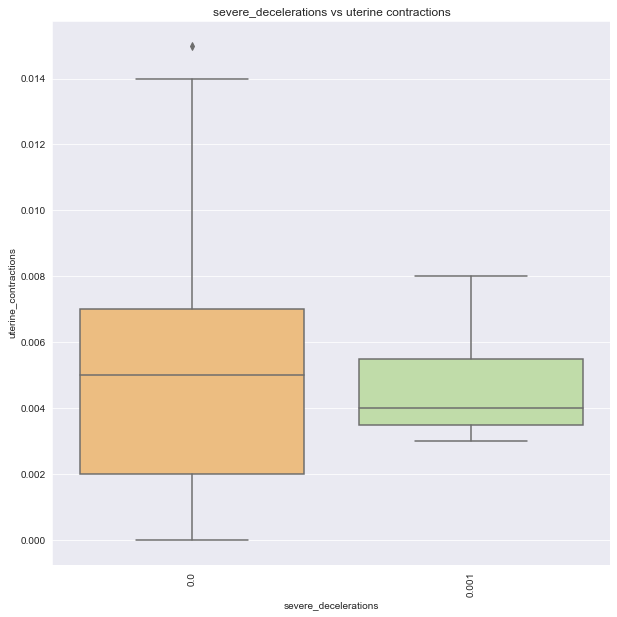

In [255]:
# Boxplot of uterine contractions over per sever deceleration of FHR
plt.figure(figsize = (10,10))
sn.boxplot(x = 'severe_decelerations', 
            y ='uterine_contractions',
            data = dataFile, 
            palette = 'Spectral').set_title('severe_decelerations vs uterine contractions')
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

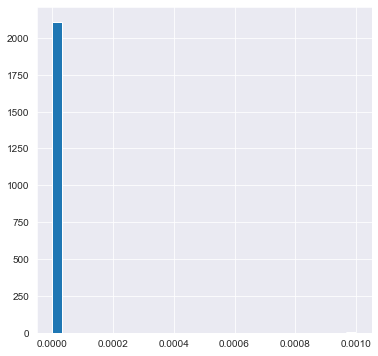

In [256]:
#Histogram showing the distribution of severe deceleration in the dataset
dataFile.severe_decelerations.hist(bins=30,figsize=(6,6))

In [257]:
#value count of the severe decelerations
dataFile.severe_decelerations.value_counts()

0.000    2106
0.001       7
Name: severe_decelerations, dtype: int64

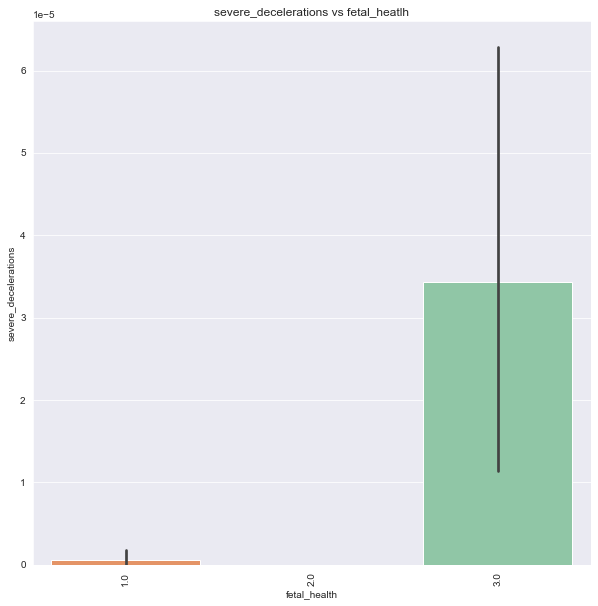

In [258]:
#boxplot of fetal health vs sever deceleration
plt.figure(figsize = (10,10))
sn.barplot(x = 'fetal_health', 
            y ='severe_decelerations',
            data = dataFile, 
            palette = 'Spectral').set_title('severe_decelerations vs fetal_heatlh')
plt.xticks(rotation='vertical')
plt.show()

In [259]:
## Baseline Models
# Evaluation function

def evaluation(y_true, y_pred):
    
# Print Accuracy, Recall, F1 Score, and Precision metrics.
    print('Evaluation Metrics:')
    print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)*100))
    print('Recall: ' + str(metrics.recall_score(y_test, y_pred,average=None)))
    print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred,average=None)))
    print('Precision: ' + str(metrics.precision_score(y_test, y_pred,average=None)))
    
# Print Confusion Matrix
    # print('\nConfusion Matrix:')
    # print(' TN,  FP, FN, TP')
    # print(confusion_matrix(y_true, y_pred).ravel())
    
# Function Prints best parameters for GridSearchCV
def print_results(results):
    print('Best Parameters: {}\n'.format(results.best_params_))    

In [260]:
# Call and fit scaler 
scaler = StandardScaler()
scaler.fit(X_train)

# Scaling our dataset
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [261]:
# Baseline Logistic Regression Model

lr_baseline = LogisticRegression(max_iter=1000)

# Fitting and predicting
lr_baseline.fit(X_train, y_train)
y_pred_lr_baseline = lr_baseline.predict(X_test)

# Evaluation Metrics
evaluation(y_test, y_pred_lr_baseline)

Evaluation Metrics:
Accuracy: 86.57844990548205
Recall: [0.96813725 0.45121951 0.66666667]
F1 Score: [0.92614302 0.56060606 0.71232877]
Precision: [0.88764045 0.74       0.76470588]


/Users/swetha/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [262]:
#Baseline decision tree with evaluation metrics for predictions on the test set
tree = DecisionTreeClassifier()

tree = tree.fit(X_train,y_train)

y_pred = tree.predict(X_test)

evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 92.24952741020795
Recall: [0.95588235 0.79268293 0.84615385]
F1 Score: [0.95471236 0.78313253 0.88      ]
Precision: [0.95354523 0.77380952 0.91666667]


In [263]:
#baseline random forest with evaluation metrics for predictions on the test set
rfc = RandomForestClassifier(random_state =1, n_estimators= 50, max_depth = 3, n_jobs =-1,verbose=1)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 87.90170132325142
Recall: [0.99509804 0.5        0.46153846]
F1 Score: [0.93656286 0.6119403  0.63157895]
Precision: [0.88453159 0.78846154 1.        ]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [264]:
# Baseline KNN Model
knn_baseline = KNeighborsClassifier()

# Fitting and predicting
knn_baseline.fit(X_train_scaled, y_train)
y_pred_knn_baseline = knn_baseline.predict(X_test_scaled)

# Evaluation metrics
evaluation(y_test, y_pred_knn_baseline)

Evaluation Metrics:
Accuracy: 88.65784499054821
Recall: [0.96078431 0.6097561  0.69230769]
F1 Score: [0.94117647 0.65359477 0.75      ]
Precision: [0.92235294 0.70422535 0.81818182]


In [266]:

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_scaled, y_train)

#Predict the response for test dataset
y_pred_svm = clf.predict(X_test_scaled)
# Evaluation metrics
evaluation(y_test, y_pred_svm)

Evaluation Metrics:
Accuracy: 89.60302457466919
Recall: [0.96323529 0.68292683 0.64102564]
F1 Score: [0.9538835  0.68292683 0.71428571]
Precision: [0.94471154 0.68292683 0.80645161]


In [265]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",rfc.feature_importances_.transpose())
coef_table

0     Coefs
0                                      baseline value  0.028791
1                                       accelerations  0.062321
2                                      fetal_movement  0.003615
3                                uterine_contractions  0.012135
4                                 light_decelerations  0.003890
5                                severe_decelerations  0.000000
6                            prolongued_decelerations  0.052883
7                     abnormal_short_term_variability  0.169925
8                mean_value_of_short_term_variability  0.155437
9   percentage_of_time_with_abnormal_long_term_var...  0.144190
10                mean_value_of_long_term_variability  0.016693
11                                    histogram_width  0.007039
12                                      histogram_min  0.016478
13                                      histogram_max  0.008841
14                          histogram_number_of_peaks  0.000614
15                         histogram_number_of_zeroes  0.000693
16                                     histogram_mode  0.112137
17                                     histogram_mean  0.103786
18                                   histogram_median  0.059801
19                                 histogram_variance  0.040259
20                                 histogram_tendency  0.000472